# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import tensorflow.keras
import matplotlib.pyplot as plt
import seaborn as sns
import math
import tensorflow as tf


from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras import layers
from tensorflow.keras import models

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM

In [ ]:
# stock_data = pd.read_csv("https://drive.google.com/file/d/1Ym4sWIkeZvHcYNX1frKXG5p22dPrFXBH/view?usp=sharing")
# news = pd.read_csv("https://drive.google.com/file/d/13LVBZX2M43PRYAd-JanMpgdH8CCAFrWI/view?usp=sharing")

# Loading the Data

In [3]:
stock = pd.read_csv('../final_stock_data.csv')

In [4]:
stock.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Movement
0,2012-07-16,18.478158,18.676643,18.475103,18.532818,301260400,0.0,0.0,1
1,2012-07-19,18.666261,18.790544,18.505029,18.759092,436861600,0.0,0.0,1
2,2012-07-23,18.150808,18.501977,17.946521,18.438766,487975600,0.0,0.0,0
3,2012-07-24,18.547165,18.617399,18.276307,18.349901,565132400,0.0,0.0,0
4,2012-07-27,17.558705,17.889109,17.454271,17.868649,403936400,0.0,0.0,1


# Data Cleaning

In [5]:
stock['Dividends'].value_counts()

0.000000    1962
0.130000       4
0.142500       4
0.157500       4
0.182500       4
0.117500       3
0.192500       3
0.220000       3
0.108929       2
0.094643       1
0.230000       1
Name: Dividends, dtype: int64

In [6]:
stock['Stock Splits'].value_counts()

0.0    1990
7.0       1
Name: Stock Splits, dtype: int64

In [7]:
stock.drop(['Dividends','Stock Splits'], axis=1, inplace=True)

In [9]:
stock.head()

,Date,Open,High,Low,Close,Volume,Movement
0,2012-07-16,18.478158,18.676643,18.475103,18.532818,301260400,1
1,2012-07-19,18.666261,18.790544,18.505029,18.759092,436861600,1
2,2012-07-23,18.150808,18.501977,17.946521,18.438766,487975600,0
3,2012-07-24,18.547165,18.617399,18.276307,18.349901,565132400,0
4,2012-07-27,17.558705,17.889109,17.454271,17.868649,403936400,1


In [10]:
stock.shape

(1991, 7)

In [11]:
stock.describe()

,Open,High,Low,Close,Volume,Movement
count,1991.000000,1991.000000,1991.000000,1991.000000,1.991000e+03,1991.000000
mean,47.666381,48.156931,47.202549,47.699269,1.911982e+08,0.529884
std,43.124547,43.674071,42.629523,43.175678,1.540023e+08,0.499232
min,12.022059,12.382439,11.933125,12.101386,4.100000e+07,0.000000
25%,22.852884,23.085305,22.620846,22.866225,9.642320e+07,0.000000
50%,31.029067,31.217623,30.904150,31.210552,1.371600e+08,1.000000
75%,48.032189,48.548661,47.523433,48.196890,2.248612e+08,1.000000
max,182.130025,182.439174,178.629624,181.511703,1.460852e+09,1.000000


In [12]:
stock.isnull().sum() # checking for null values

Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Movement    0
dtype: int64

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

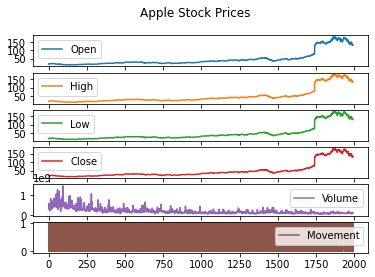

In [13]:
stock.plot.line(subplots = True, title='Apple Stock Prices')

In [15]:
labels = pd.read_csv('../news_label.csv')

In [16]:
labels.head()

,Date,Sentiment
0,2012-07-16,0.0
1,2012-07-19,0.0
2,2012-07-23,0.0
3,2012-07-24,0.0
4,2012-07-27,0.0


In [17]:
labels.shape

(1991, 2)

In [18]:
dataset = pd.merge(stock, labels)

In [19]:
x = dataset.drop(['Movement'], axis=1)
x

,Date,Open,High,Low,Close,Volume,Sentiment
0,2012-07-16,18.478158,18.676643,18.475103,18.532818,301260400,0.000000
1,2012-07-19,18.666261,18.790544,18.505029,18.759092,436861600,0.000000
2,2012-07-23,18.150808,18.501977,17.946521,18.438766,487975600,0.000000
3,2012-07-24,18.547165,18.617399,18.276307,18.349901,565132400,0.000000
4,2012-07-27,17.558705,17.889109,17.454271,17.868649,403936400,0.000000
...,...,...,...,...,...,...,...
1986,2022-06-15,134.289993,137.339996,132.160004,135.429993,91533000,0.000000
1987,2022-06-16,132.080002,132.389999,129.039993,130.059998,108123900,-0.833333
1988,2022-06-17,130.070007,133.080002,129.809998,131.559998,134118500,0.058824
1989,2022-06-21,133.419998,137.059998,133.320007,135.869995,81000500,0.600000


In [20]:
y = dataset['Movement']

In [21]:
y

0       1
1       1
2       0
3       0
4       1
       ..
1986    1
1987    0
1988    1
1989    1
1990    0
Name: Movement, Length: 1991, dtype: int64

# Splitting the dataset into train and test

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)
##X_train = x.iloc[:1590]
#X_test = x.iloc[1590:]
#y_train = y.iloc[:1590]
#y_test = y.iloc[1590:]

In [23]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1692, 7) (299, 7) (1692,) (299,)


In [24]:
X_train

,Date,Open,High,Low,Close,Volume,Sentiment
0,2012-07-16,18.478158,18.676643,18.475103,18.532818,301260400,0.000000
1,2012-07-19,18.666261,18.790544,18.505029,18.759092,436861600,0.000000
2,2012-07-23,18.150808,18.501977,17.946521,18.438766,487975600,0.000000
3,2012-07-24,18.547165,18.617399,18.276307,18.349901,565132400,0.000000
4,2012-07-27,17.558705,17.889109,17.454271,17.868649,403936400,0.000000
...,...,...,...,...,...,...,...
1687,2019-11-11,63.455637,64.480069,63.450726,64.413742,81821200,0.333333
1688,2019-11-12,64.254058,64.558689,64.099294,64.354782,87388800,0.142857
1689,2019-11-13,64.150872,65.047553,64.136133,64.971397,102734400,-0.166667
1690,2019-11-14,64.794514,65.072118,64.389166,64.521828,89182800,0.083333


In [25]:
X_train = X_train.drop(['Date'],axis=1)

In [64]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
X_train = sc.fit_transform(X_train)

In [65]:
X_test = X_test.drop(['Date'],axis=1)
sc = MinMaxScaler(feature_range=(0, 1))
X_test = sc.fit_transform(X_test)

In [67]:
X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')

X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')


# Modelling

In [68]:
model = Sequential()
#model.add(LSTM(units=50, return_sequences=True, input_shape = (X_train.shape[0], X_train.shape[1])))
model.add(layers.InputLayer((6,)))
model.add(Dense(256))
model.add(Dropout(0.1)) 
model.add(Dense(256))
model.add(Dense(1, activation="sigmoid"))

In [69]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 256)               1792      
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 257       
Total params: 67,841
Trainable params: 67,841
Non-trainable params: 0
_________________________________________________________________


In [70]:
model.fit(X_train, y_train, batch_size=16, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
106/106 [==============================] - 1s 6ms/step - loss: 0.6992 - accuracy: 0.5272 - val_loss: 0.6892 - val_accuracy: 0.5452
Epoch 2/100
106/106 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.5260 - val_loss: 0.6736 - val_accuracy: 0.6020
Epoch 3/100
106/106 [==============================] - 0s 4ms/step - loss: 0.6958 - accuracy: 0.5343 - val_loss: 0.6861 - val_accuracy: 0.5318
Epoch 4/100
106/106 [==============================] - 0s 4ms/step - loss: 0.6917 - accuracy: 0.5296 - val_loss: 0.6812 - val_accuracy: 0.6020
Epoch 5/100
106/106 [==============================] - 0s 4ms/step - loss: 0.6896 - accuracy: 0.5431 - val_loss: 0.6792 - val_accuracy: 0.5251
Epoch 6/100
106/106 [==============================] - 0s 4ms/step - loss: 0.6895 - accuracy: 0.5414 - val_loss: 0.6858 - val_accuracy: 0.5585
Epoch 7/100
106/106 [==============================] - 0s 4ms/step - loss: 0.6915 - accuracy: 0.5319 - val_loss: 0.6723 - val_accuracy: 0.6120

KeyboardInterrupt: 